# Polynomial Curve Fitting



## Topics learned

- Sine (sin + noise) waves creation
- How to create Gaussian noise
- Sample points from the sine function and try to fit them to the curve using polinomials 
- Analise different orders of polinomials for the best fit, (no overfitting, or underfitting) 



Training data comprising N observations of x, written $x = (x_1, ..., x_n)^T$, having corresponding observations $t = (t_1, t_2, ... t_n)^T$.

Estimated function: $sin(2\pi x)$

x's are generated uniformly in range [0, 1] <br>
t's are generated by computinng estimated function, then addiding a small Gaussian blur

## Part 1 

Generating inputs and outputs with the noise

In [392]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [304]:
def generate_uniform_points(N: int):
    interval = 1 / (N - 1)
    points = [i * interval for i in range(N)]
    return points

In [311]:
def generate_data(N: int = 10, fx =  lambda x: np.sin(2 * np.pi * x), with_noise: bool = True):
  x_n = generate_uniform_points(N)
  mu, sigma = 0, 0.1
  y_n = [fx(x_i) + fx(x_i) * ( with_noise * np.random.normal(mu, sigma)) for x_i in x_n]
  return (x_n, y_n)

In [323]:
x_n, t_n = generate_data(with_noise=True, N=10)

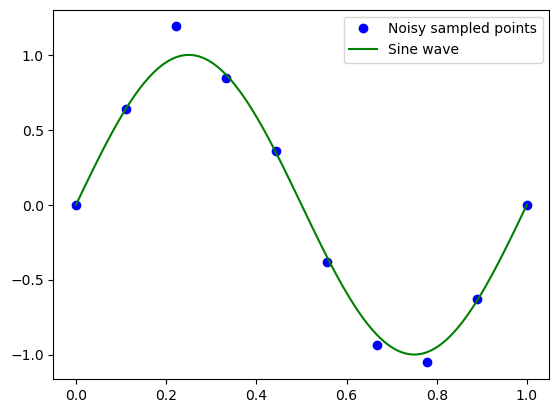

In [324]:

x, t = generate_data(with_noise=False, N=100)
plt.plot(x_n, t_n, 'bo', x, t, 'g-')
plt.legend(('Noisy sampled points', 'Sin wave'))

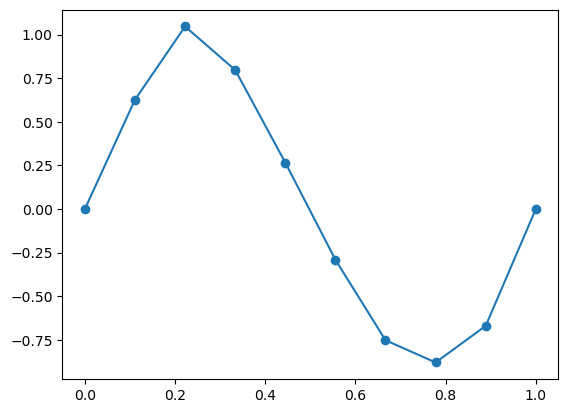

In [154]:
x_n, y_n = generate_data(with_noise=True, N=10)
plt.plot(x_n, y_n, marker = 'o')

## Part 2 

> Goal: Exploit training set in order to make predictions of the value $t^{\wedge}$ from the input of $x^{\wedge}$

Currently we will try a simple approach based on the curve fitting. We will approximate the sin function using the following polynomial:
$$y(x, w) = w_0 + w_1x + w_2x^2 + ... + w_mx^m = \sum_{j=0}^{M}w_j^jx_n^j $$

where $M$ is the order of polynomial and $x^j$ denotes $x$ raised to the power of $j$

Polynomial coefficients (weights) is vector $w = w_0,...,w_m$.

Although, the polynomial itself is not linear function resp. to $x$, it is linear resp. to w. 
 

> Such models which are linear in terms of $w$ are called linear models


The values of the coefficient can be determined by the polynomial of the training data. This can be estimated by minizing the error. 

But then the question stands on how should be compute this error function.

One good choice for the error function can be the squared sum difference, formally:
$E(\textbf{w}) = \frac{1}{2}\sum_{n=1}^{N}(y(x_n, \textbf{w}) - t_n)^2$

Now out task can be defined as minimizing the error function to get the best estimation

To compute the estimation we need to know two things
1. $w_i$ in the formula for polynomial
2. $M$ the order of polynomial 


We can compute $w_i$ using 1-st order derivative of the error function (If the error function is zero, then we are satisfied). 

Computing $M$ is rather impossible analitically so it will act as hyperparameter function for our estimator



From [Hint](https://math.stackexchange.com/questions/2854751/exercise-1-1-from-introduction-of-pattern-recognition-and-machine-learning-by-ch) we get that 
$$w^* = X^{-1}*T_i$$

We will use numpy `.polfit` function for predicting `w*`

## Polynomial curve fitting

In [363]:
M = 3
w_star = np.polyfit(x_n, t_n, M)
print(f"Coefficients are {w_star}")


Coefficients are [ 22.69567612 -33.96878021  11.41484933  -0.05564759]


In [364]:
p = np.poly1d(w_star)
y_pred = p(x_n)
y_pred

array([-0.05564759,  0.82443396,  1.05257588,  0.81557387,  0.30022361,
       -0.30667922, -0.81833891, -1.04795979, -0.80874617,  0.08609765])

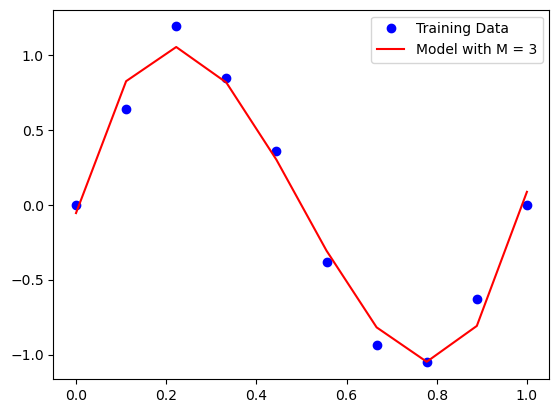

In [365]:
plt.figure
plt.plot(x_n, t_n, 'bo', x_n, y_pred, 'r-')
plt.legend(('Training Data', f'Model with M = {M}'))

#### Compute MSE

In [366]:
err = (0.5)*(np.sum(y_pred - t_n)**2)
err

2.3224713125132874e-27

## Check the output for the new data point

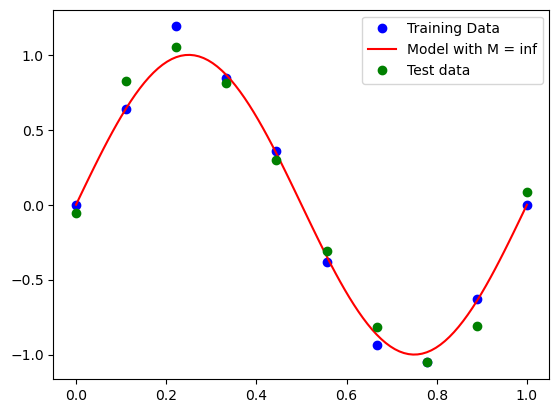

In [369]:
x_test, t_test = generate_data(N=10, with_noise=True)
y_pred_test = p(x_test)

plt.figure
plt.plot(x_n, t_n, 'bo', x, t, 'r-', x_test, y_pred_test, 'go')
plt.legend(('Training Data', f'Model with M = inf', 'Test data'))

## Polinomial Curve fitting with different M (different polynomial base)

Now let's analise how the power of the polynomial will affect the linear polinomial regression algorithm

In [401]:
x_2, t_2 = generate_data(with_noise=True, N=100)

In [402]:
def generate_for_m(M = 3):
  w_0 = np.polyfit(x_2, t_2, M)
  p = np.poly1d(w_0)
  y_pred = p(x_2)


  plt.figure
  random_idx = [int(random.random() * len(x_2)) for x in range(10)]
  plt.plot(np.take(x_2, random_idx), np.take(t_2, random_idx), 'bo', x_2, y_pred, 'r-', x, t, 'g-',)
  plt.legend(('Training Data', f'Model with M = {M}', 'Original function sine'))


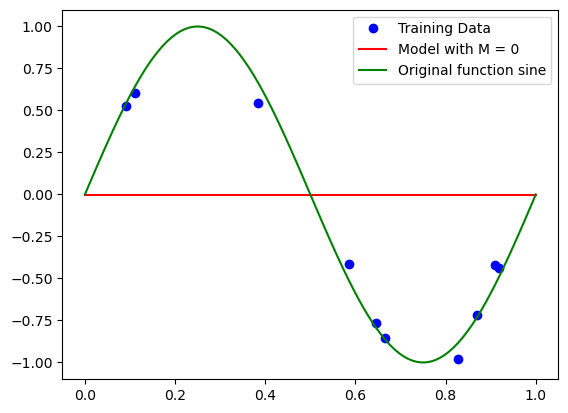

In [403]:
# M = 0
generate_for_m(M=0)

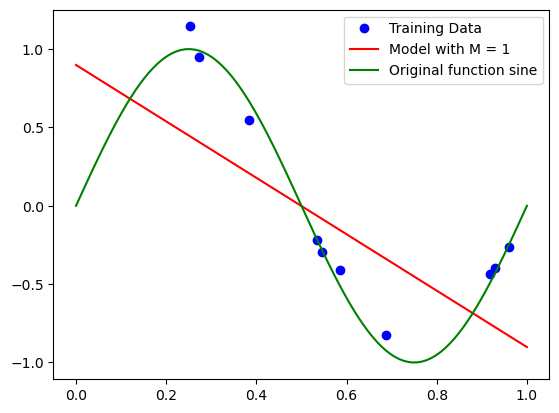

In [404]:
# M = 1
generate_for_m(M=1)

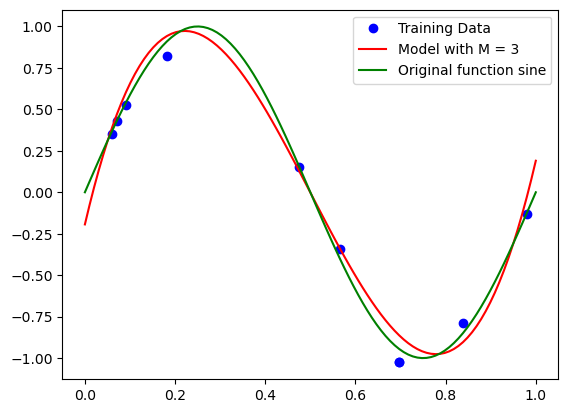

In [406]:
# M = 3
generate_for_m(M=3)

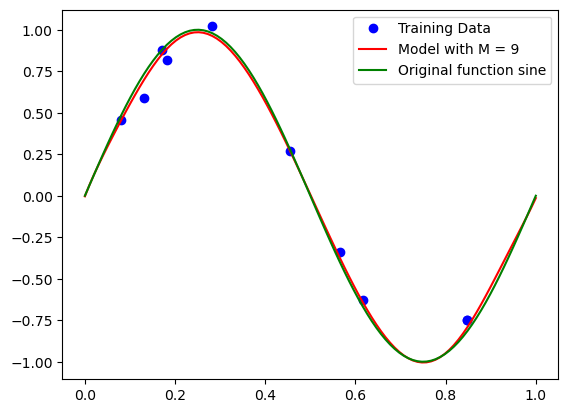

In [407]:
# M = 9
generate_for_m(M=9)

## Compare how the models perform with different data using RMS

So far we have seen that the bigger is M, the more accurately our polinomial will represent the testing data. However, this does not immediately imply that we are estimating correcly the original function, (which was sine). To check it we need to test various models with different set of data: training and test, and compare their error functions

In [653]:
N = 20

In [654]:
# Generate noise

normal = lambda mu, sigma: np.random.normal(mu, sigma)
mu, sigma = 0, 0.1
noise = [ normal(mu, sigma) for x in range(N) ]
noise[:10]

[-0.04281366997082375,
 -0.06989686030446556,
 0.08685039453940162,
 -0.014062659412207662,
 -0.05201740548311368,
 0.11538968587553709,
 0.15330388758833283,
 0.14224294088783265,
 0.07337660969746412,
 0.25639947858223117]

In [655]:
func = lambda x: np.sin(2 * np.pi * x)

In [657]:
def train_test_split(data, train_size = 80):
  train_indeces = np.sort(np.random.choice(np.arange(0, len(data)), int((train_size / 100) * len(data)), replace=False))  
  ind = np.arange(0, len(data))
  test_indeces = ind[~np.isin(ind, train_indeces)]
  # print(train_indeces, test_indeces)
  train_data = np.take(data, train_indeces)
  test_data = np.take(data, test_indeces)
  return train_data, test_data
  

In [687]:
x = generate_uniform_points(N)
# x = np.linspace(0, 1, num=N)

x_orig, x_test = train_test_split(x, train_size=50)
# x_orig, x_test = np.linspace(0, 1, num=N), np.linspace(1, 2, num=N)


In [688]:
# Generate x,y 
t_orig = [func(x_i) for x_i in x_orig] 


In [689]:
y_train = [func(x_i) + func(x_i) * noise[i] for i, x_i in enumerate(x_orig)]
y_test = [func(x_i) + func(x_i) * (noise[i]) for i, x_i in enumerate(x_test)]

In [695]:

def generate_for_m(x, t, x_orig, t_orig, pol=None, M=None, show_graph=True):
  w_0 = np.polyfit(x, t, M) if M else 0
  p = pol if pol else np.poly1d(w_0)
  y_pred = p(x)


  plt.figure
  random_idx = [int(random.random() * len(x)) for _ in range(10)]

  err = 0.5*(np.sum((y_pred-t)**2))
  rms = np.sqrt(2 * err / len(x))
  if show_graph:
    plt.plot(x, t, 'b-', x, y_pred, 'r-', )
    plt.legend(('Training Data', f'Model with M = {M}'))
  return p, rms


poly1d([-1.65504448e+05,  7.81802164e+05, -1.60359185e+06,  1.86834476e+06,
       -1.35697740e+06,  6.33733100e+05, -1.88911416e+05,  3.42713477e+04,
       -3.37125207e+03,  1.33463241e+02])

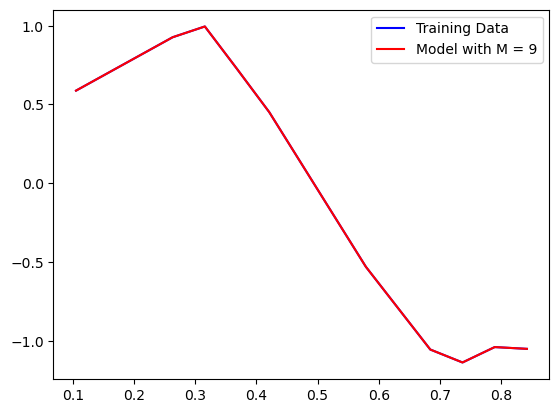

In [696]:
p, _ = generate_for_m(x_orig, y_train, x_orig, t_orig, M=9)
p

(poly1d([-1.65504448e+05,  7.81802164e+05, -1.60359185e+06,  1.86834476e+06,
        -1.35697740e+06,  6.33733100e+05, -1.88911416e+05,  3.42713477e+04,
        -3.37125207e+03,  1.33463241e+02]),
 49.00272111533749)

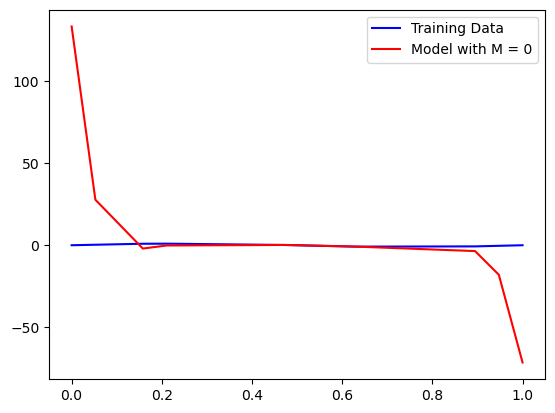

In [697]:
generate_for_m(x_test, y_test, x_orig, t_orig, M=0, pol=p)

In [702]:

err_test = []
err_train = []
for x in range(10):
  p, err = generate_for_m(x_orig, y_train, x_orig, t_orig, M=x, show_graph=False)
  err_train.append([err, x])
  _, err = generate_for_m(x_test, y_test, x_orig, t_orig, M=x, show_graph=False, pol=p)
  err_test.append([err, x])

err_test, err_train

([[0.5678274524220122, 0],
  [0.9654452093948355, 1],
  [1.0921827862805096, 2],
  [0.2752000187645122, 3],
  [0.2877165906398316, 4],
  [0.7505898596230849, 5],
  [0.9927835789129644, 6],
  [8.250816057466226, 7],
  [10.150010628083097, 8],
  [49.00272111533749, 9]],
 [[0.8835931977185649, 0],
  [0.3392402871145795, 1],
  [0.2988491315182805, 2],
  [0.05696124434423874, 3],
  [0.05667011747683366, 4],
  [0.038356563082263366, 5],
  [0.038075058428425755, 6],
  [0.013898184967558895, 7],
  [0.012209365054196647, 8],
  [4.627492558451394e-11, 9]])

In [703]:
list(list(zip(*err_train))[0])

[0.8835931977185649,
 0.3392402871145795,
 0.2988491315182805,
 0.05696124434423874,
 0.05667011747683366,
 0.038356563082263366,
 0.038075058428425755,
 0.013898184967558895,
 0.012209365054196647,
 4.627492558451394e-11]

(0.0, 2.0)

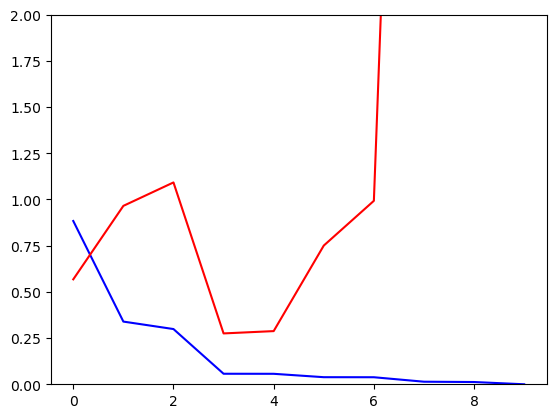

In [704]:
plt.plot(list(list(zip(*err_train))[1]), list(list(zip(*err_train))[0]), 'b-', list(list(zip(*err_test))[1]), list(list(zip(*err_test))[0]), 'r-', )
plt.ylim([0, 2])


As we can see the more complex polynomial becomes the more it starts to overfit over test values. That is why hyperparameter `M` should be chosen carefully and testing your model is a must

## Increasing size of the train data

Let\'s show that by increasing the number of the training samples we can reduce the overfitting problem 

Why?

In [706]:
N = 100
x = generate_uniform_points(N)
# x = np.linspace(0, 1, num=N)

x_orig, x_test = train_test_split(x, train_size=50)

In [708]:
normal = lambda mu, sigma: np.random.normal(mu, sigma)
mu, sigma = 0, 0.1
noise = [ normal(mu, sigma) for x in range(N) ]
noise[:10]

[0.027655705704087003,
 0.10949228212848001,
 0.003273832954758701,
 0.02424106577022947,
 -0.13940962667685328,
 0.10342977556273564,
 0.03612974426641468,
 -0.24036747528263713,
 0.07378622584687154,
 -0.09159345802472907]

In [709]:
y_train = [func(x_i) + func(x_i) * noise[i] for i, x_i in enumerate(x_orig)]
y_test = [func(x_i) + func(x_i) * (noise[i]) for i, x_i in enumerate(x_test)]

In [710]:
err_test = []
err_train = []
for x in range(10):
  p, err = generate_for_m(x_orig, y_train, x_orig, t_orig, M=x, show_graph=False)
  err_train.append([err, x])
  _, err = generate_for_m(x_test, y_test, x_orig, t_orig, M=x, show_graph=False, pol=p)
  err_test.append([err, x])

err_test, err_train

([[0.7389654228584189, 0],
  [0.4670484146234135, 1],
  [0.4688407541967009, 2],
  [0.112387448246684, 3],
  [0.11240317877794394, 4],
  [0.08788228412250829, 5],
  [0.08774739720758869, 6],
  [0.08763275372249563, 7],
  [0.09015395315207443, 8],
  [0.09072845300843721, 9]],
 [[0.7074416542392696, 0],
  [0.4759562549406156, 1],
  [0.47502749592196347, 2],
  [0.09760317366494883, 3],
  [0.09760184079278747, 4],
  [0.07946902836201669, 5],
  [0.079364681036347, 6],
  [0.07906412203021404, 7],
  [0.07846606892562433, 8],
  [0.07813029475347616, 9]])

(0.0, 1.0)

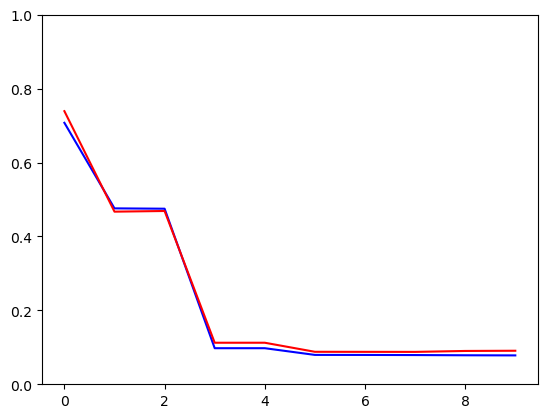

In [712]:
plt.plot(list(list(zip(*err_train))[1]), list(list(zip(*err_train))[0]), 'b-', list(list(zip(*err_test))[1]), list(list(zip(*err_test))[0]), 'r-', )
plt.ylim([0, 1])

## Summary

> The bigger and versitale is provided data, the more complex and flexible is the model we can afford 

Heuristic here can be that the number of data points should be no less than some multiple of the number of adaptive parameters in the model

However, this is not always the best benchmark to measure model complexity

### Regularization 

Overall most of the times, it is not possible to get more data for the training set to make the model complex enough. In this situations we need to use **Regularization** techniques, which will put the penalties for using big coefficients.

Tipically it is done though the error function:

$$E^{\sim} = \frac{1}{2} \sum_{n=1}^N \{y(x_n, w) - t_n\}^2 + \frac{\lambda}{2}||w||^2$$
where ${||w||^2 = \bold{w} * \bold{w^T} = w_0^2 + w_1^2 + ... + w_M^2}$ 
$\lambda$ here tell about the relative importance of the regularization term compared to overall error function. 

Sometimes $w_0$ term is omitted to restrict the possibility of being dependent on the choise of origin of $w$.

In the litrature this terms are known are _shrinkage_ methods because they reduce the value of coefficients. 

Quadratic regulazer as specified here is called _ridge regression_, in context of Neural Networks it is called _weight decay_

